# Group Assignment #1

## Contributor: Emily Cadena

### Which social demographic factors are most vulnerable to traffic collisions in Los Angeles County?

#### Our research will evaluate different socio-demographic characteristics, such as median household income, race and ethnicity, and age to explore which communities are most susceptible to traffic collisions in Los Angeles County. This notebook will explore race and ethnicity in LA County. 


# Data Sources & Geographic Information  
American Community Survey (ACS) 2019-2023 (5-Year Estimates) - Hispanic or Latino by Race  
2023 TIGER/Line Shapefiles: California Census Tracts 


# Importing Pandas for data exploration 

In [55]:
# importing pandas for data exploration and data analysis
import pandas as pd 

In [56]:
# upload acs data 
df = pd.read_csv('data2/2race2019_2023.csv')

In [57]:
# find out how many rows and columns 
# 2498 aligns with the number of census tracts in LA County 
df.shape

(2498, 43)

In [58]:
# exploring the csv information 
# appears that GEO_FIPS, Geo_State, & Geo_County data type is an integer, indicating the leading zero is missing 
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geo_FIPS       2498 non-null   int64  
 1   Geo_QName      2498 non-null   object 
 2   Geo_STUSAB     2498 non-null   object 
 3   Geo_SUMLEV     2498 non-null   int64  
 4   Geo_GEOCOMP    2498 non-null   int64  
 5   Geo_US         0 non-null      float64
 6   Geo_REGION     0 non-null      float64
 7   Geo_DIVISION   0 non-null      float64
 8   Geo_STATE      2498 non-null   int64  
 9   Geo_COUNTY     2498 non-null   int64  
 10  Geo_COUSUB     0 non-null      float64
 11  Geo_PLACE      0 non-null      float64
 12  Geo_TRACT      2498 non-null   int64  
 13  Geo_CNECTA     2498 non-null   object 
 14  Geo_NECTADIV   2498 non-null   object 
 15  Geo_UA         0 non-null      float64
 16  Geo_CDCURR     0 non-null      float64
 17  Geo_SLDU       0 non-null      float64
 18  Geo_SLDL

In [59]:
# obtaining a sample of csv 
# confirming that the leading zero is missing for FIPS, State and County 
df.head(5)

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,...,SE_B04001_001,SE_B04001_002,SE_B04001_003,SE_B04001_004,SE_B04001_005,SE_B04001_006,SE_B04001_007,SE_B04001_008,SE_B04001_009,SE_B04001_010
0,6037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,4152,2725,2201,82,4,292,5,12,129,1427
1,6037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,4198,3785,3036,25,0,544,0,21,159,413
2,6037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,3434,2122,1517,10,48,490,0,17,40,1312
3,6037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,3931,2503,1725,150,0,390,0,85,153,1428
4,6037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,2572,1298,1182,14,0,38,25,0,39,1274


# Converting data types 

In [60]:
# reviewing FIPS because the leading zero is missing 
# leading zero is also missing for state and county
df.Geo_FIPS.head()

0    6037101110
1    6037101122
2    6037101220
3    6037101221
4    6037101222
Name: Geo_FIPS, dtype: int64

In [61]:
# converting FIPS, state, and county data type from integer to string to include leading zero 
df = pd.read_csv('data2/2race2019_2023.csv',
     dtype=
                 {'Geo_FIPS': str, 
                  'Geo_STATE': str, 
                  'Geo_COUNTY': str })

In [62]:
# confirming the leading zero is added 
df.head(5)

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,...,SE_B04001_001,SE_B04001_002,SE_B04001_003,SE_B04001_004,SE_B04001_005,SE_B04001_006,SE_B04001_007,SE_B04001_008,SE_B04001_009,SE_B04001_010
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,4152,2725,2201,82,4,292,5,12,129,1427
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,4198,3785,3036,25,0,544,0,21,159,413
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,3434,2122,1517,10,48,490,0,17,40,1312
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,3931,2503,1725,150,0,390,0,85,153,1428
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,2572,1298,1182,14,0,38,25,0,39,1274


In [63]:
# double-checking the data type for the three columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geo_FIPS       2498 non-null   object 
 1   Geo_QName      2498 non-null   object 
 2   Geo_STUSAB     2498 non-null   object 
 3   Geo_SUMLEV     2498 non-null   int64  
 4   Geo_GEOCOMP    2498 non-null   int64  
 5   Geo_US         0 non-null      float64
 6   Geo_REGION     0 non-null      float64
 7   Geo_DIVISION   0 non-null      float64
 8   Geo_STATE      2498 non-null   object 
 9   Geo_COUNTY     2498 non-null   object 
 10  Geo_COUSUB     0 non-null      float64
 11  Geo_PLACE      0 non-null      float64
 12  Geo_TRACT      2498 non-null   int64  
 13  Geo_CNECTA     2498 non-null   object 
 14  Geo_NECTADIV   2498 non-null   object 
 15  Geo_UA         0 non-null      float64
 16  Geo_CDCURR     0 non-null      float64
 17  Geo_SLDU       0 non-null      float64
 18  Geo_SLDL

# Cleaning & Reorganizing the data

In [64]:
# finding unnecessary columns (with zero values)
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_UA',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_PUMA5',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

In [65]:
# finding and deleting unnecessary columns
df = df.dropna(axis=1,how="all")

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Geo_FIPS       2498 non-null   object
 1   Geo_QName      2498 non-null   object
 2   Geo_STUSAB     2498 non-null   object
 3   Geo_SUMLEV     2498 non-null   int64 
 4   Geo_GEOCOMP    2498 non-null   int64 
 5   Geo_STATE      2498 non-null   object
 6   Geo_COUNTY     2498 non-null   object
 7   Geo_TRACT      2498 non-null   int64 
 8   Geo_CNECTA     2498 non-null   object
 9   Geo_NECTADIV   2498 non-null   object
 10  Geo_GEO_ID     2498 non-null   object
 11  Geo_NAME       2498 non-null   object
 12  SE_B04001_001  2498 non-null   int64 
 13  SE_B04001_002  2498 non-null   int64 
 14  SE_B04001_003  2498 non-null   int64 
 15  SE_B04001_004  2498 non-null   int64 
 16  SE_B04001_005  2498 non-null   int64 
 17  SE_B04001_006  2498 non-null   int64 
 18  SE_B04001_007  2498 non-null

In [67]:
# keep columns 
#created a new dataframe with selected columns 
columns_to_keep = ['Geo_FIPS',
                   'Geo_STATE',
                   'Geo_COUNTY',
                   'Geo_TRACT',
                   'SE_B04001_001',  
                   'SE_B04001_002', 
                   'SE_B04001_003', 
                   'SE_B04001_004',
                   'SE_B04001_005',
                   'SE_B04001_006', 
                   'SE_B04001_007',  
                   'SE_B04001_008',  
                   'SE_B04001_009',  
                   'SE_B04001_010']

df2 =df[columns_to_keep]         
                   

In [68]:
df2.head(5)

,Geo_FIPS,Geo_STATE,Geo_COUNTY,Geo_TRACT,SE_B04001_001,SE_B04001_002,SE_B04001_003,SE_B04001_004,SE_B04001_005,SE_B04001_006,SE_B04001_007,SE_B04001_008,SE_B04001_009,SE_B04001_010
0,06037101110,06,037,101110,4152,2725,2201,82,4,292,5,12,129,1427
1,06037101122,06,037,101122,4198,3785,3036,25,0,544,0,21,159,413
2,06037101220,06,037,101220,3434,2122,1517,10,48,490,0,17,40,1312
3,06037101221,06,037,101221,3931,2503,1725,150,0,390,0,85,153,1428
4,06037101222,06,037,101222,2572,1298,1182,14,0,38,25,0,39,1274


In [69]:
df2.columns.to_list()
    

['Geo_FIPS',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 'SE_B04001_001',
 'SE_B04001_002',
 'SE_B04001_003',
 'SE_B04001_004',
 'SE_B04001_005',
 'SE_B04001_006',
 'SE_B04001_007',
 'SE_B04001_008',
 'SE_B04001_009',
 'SE_B04001_010']

In [70]:
#rename columns 
df2.columns = ['FIPS', 
               'State',
               'County',
               'Census Tract',
               'Total Population',
               'Not Hispanic or Latino',
               'White Alone',
               'Black or African American Alone',
               'American Indian and Alaska Native Alone',
               'Asian Alone',
               'Native Hawaiian and Other Pacific Islander Alone',
               'Some Other Race Alone',
               'Two or More Races',
               'Hispanic or Latino']
               
    

In [71]:
df2.head(5)

,FIPS,State,County,Census Tract,Total Population,Not Hispanic or Latino,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian and Other Pacific Islander Alone,Some Other Race Alone,Two or More Races,Hispanic or Latino
0,06037101110,06,037,101110,4152,2725,2201,82,4,292,5,12,129,1427
1,06037101122,06,037,101122,4198,3785,3036,25,0,544,0,21,159,413
2,06037101220,06,037,101220,3434,2122,1517,10,48,490,0,17,40,1312
3,06037101221,06,037,101221,3931,2503,1725,150,0,390,0,85,153,1428
4,06037101222,06,037,101222,2572,1298,1182,14,0,38,25,0,39,1274


In [72]:
# quick stats 
df2 ['Total Population'].describe()

count     2498.000000
mean      3942.516413
std       1435.213381
min          0.000000
25%       2959.750000
50%       3873.500000
75%       4817.750000
max      12987.000000
Name: Total Population, dtype: float64

In [73]:
## so next steps is to fund the sum for each and then create a bar chart (with title, category, and value)
df2['White Alone'].sum()

np.int64(2477324)

In [74]:
# finding the sum for each race and ethnicity 
print(df2['White Alone'].sum())
print(df2['Black or African American Alone'].sum())
print(df2['Asian Alone'].sum())
print(df2['Hispanic or Latino'].sum())

2477324
742849
1458413
4753369


[Text(0, 0, '0'),
 Text(0, 1000000, '1000000'),
 Text(0, 2000000, '2000000'),
 Text(0, 3000000, '3000000'),
 Text(0, 4000000, '4000000'),
 Text(0, 5000000, '5000000')]

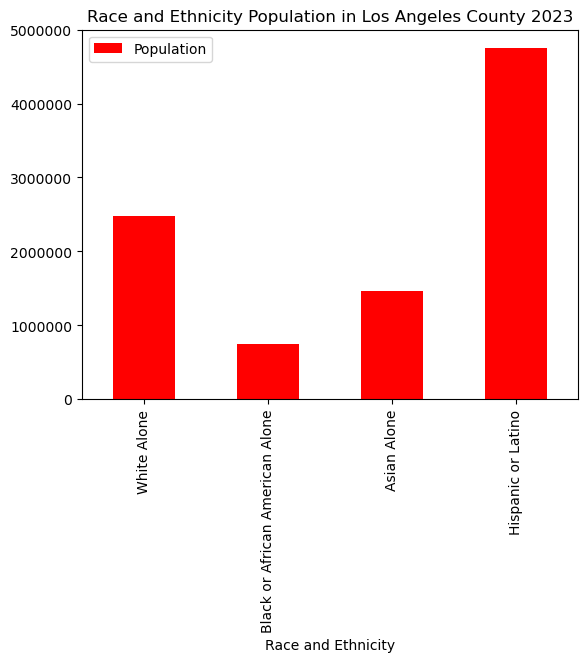

In [75]:
# created a bar chart of race and ethnicity in LA County 
# perhaps a pie chart of race and ethnicity in percent would be more helpful 
#
df = pd.DataFrame({'Race and Ethnicity':['White Alone', 'Black or African American Alone', 'Asian Alone', 'Hispanic or Latino'], 
                   'Population':[2477324, 742849, 1458413, 4753369]})
ax=df.plot.bar(x='Race and Ethnicity', 
               y='Population', 
               title='Race and Ethnicity Population in Los Angeles County 2023',
               color='red')

yticks = range(0, max(df['Population']) + 1000000, 1000000)
ax.set_yticks(yticks)
ax.set_yticklabels([f'{int(tick / 1)}' for tick in yticks])



Axes(0.125,0.11;0.775x0.77)


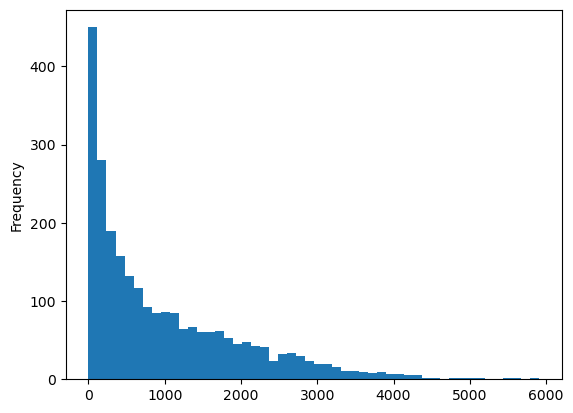

In [76]:
# plotting histograms to see the distribution for each category
# this will inform the intervals when mapping 
# White Alone 
print(df2['White Alone'].plot.hist(bins=50))
      

Axes(0.125,0.11;0.775x0.77)


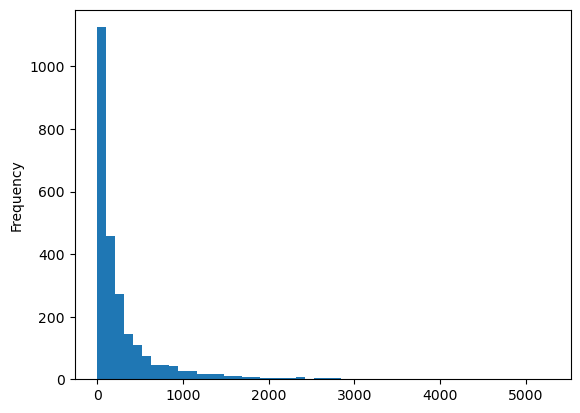

In [77]:
# Black or African American Alone
print(df2['Black or African American Alone'].plot.hist(bins=50))
      

Axes(0.125,0.11;0.775x0.77)


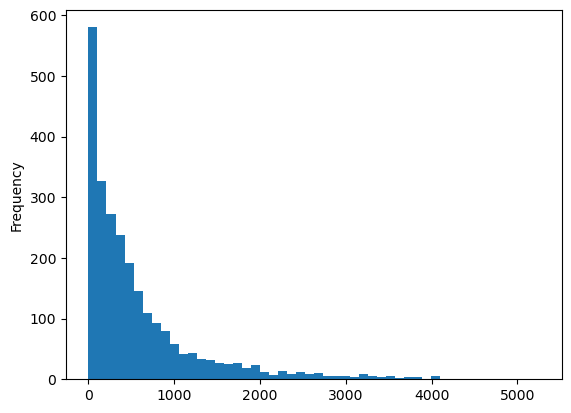

In [78]:
# Asian Alone
print(df2['Asian Alone'].plot.hist(bins=50))
      

Axes(0.125,0.11;0.775x0.77)


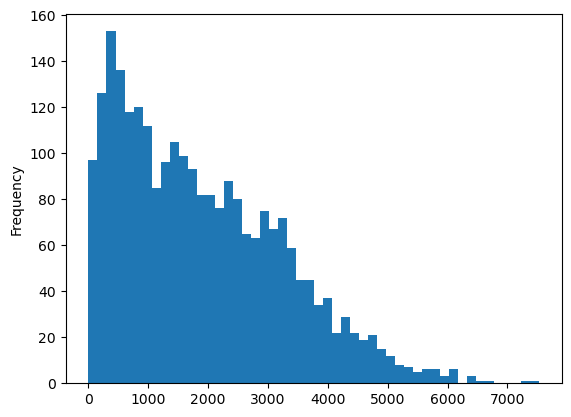

In [79]:
# Hispanic or Latino
print(df2['Hispanic or Latino'].plot.hist(bins=50))
      

# Static Maps

In [80]:
import geopandas as gpd
pd.options.mode.chained_assignment = None  # default='warn'

In [81]:
#add 2023 census tracts 
# general note - geopandas uses read.file where pandas would use read.csv
tracts=gpd.read_file('data2/ca_tract.zip')

In [82]:
tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,001,442700,06001442700,1400000US06001442700,4427,Census Tract 4427,G5020,S,1234016,0,+37.5371513,-122.0081095,"POLYGON ((-122.01721 37.53932, -122.01719 37.5..."
1,06,001,442800,06001442800,1400000US06001442800,4428,Census Tract 4428,G5020,S,1278646,0,+37.5293619,-121.9931002,"POLYGON ((-122.0023 37.52984, -122.00224 37.52..."
2,06,037,204920,06037204920,1400000US06037204920,2049.20,Census Tract 2049.20,G5020,S,909972,0,+34.0175004,-118.1974975,"POLYGON ((-118.20284 34.01966, -118.20283 34.0..."
3,06,037,205110,06037205110,1400000US06037205110,2051.10,Census Tract 2051.10,G5020,S,286962,0,+34.0245059,-118.2142985,"POLYGON ((-118.21964 34.02628, -118.21945 34.0..."
4,06,037,320101,06037320101,1400000US06037320101,3201.01,Census Tract 3201.01,G5020,S,680504,0,+34.2992784,-118.4326573,"POLYGON ((-118.43882 34.29911, -118.43732 34.3..."


<Axes: >

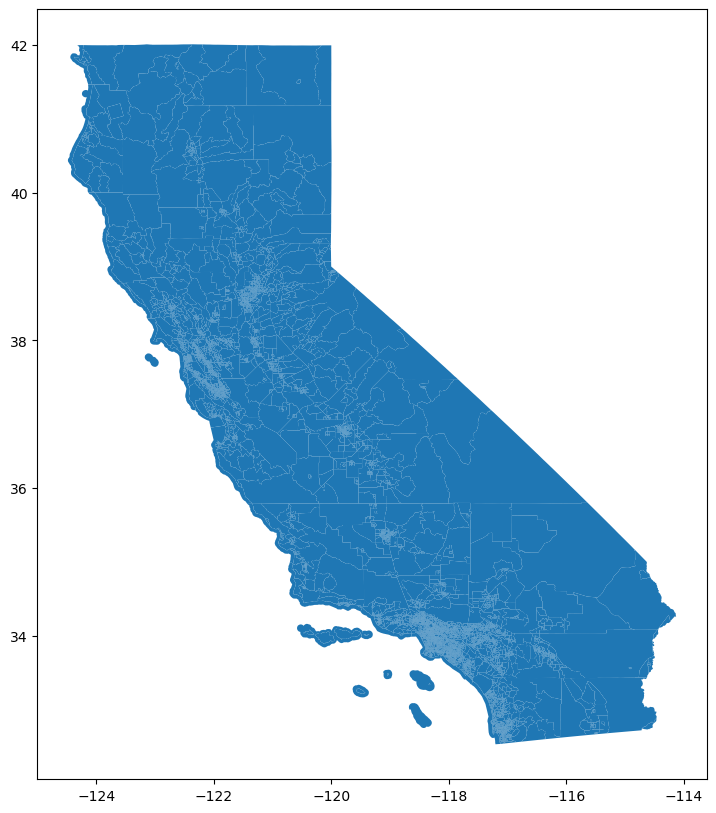

In [83]:
# plot census tracts 
# entire state of California, so we need to trim
tracts.plot(figsize=(12,10))

In [84]:
# review sampele
tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,001,442700,06001442700,1400000US06001442700,4427,Census Tract 4427,G5020,S,1234016,0,+37.5371513,-122.0081095,"POLYGON ((-122.01721 37.53932, -122.01719 37.5..."
1,06,001,442800,06001442800,1400000US06001442800,4428,Census Tract 4428,G5020,S,1278646,0,+37.5293619,-121.9931002,"POLYGON ((-122.0023 37.52984, -122.00224 37.52..."
2,06,037,204920,06037204920,1400000US06037204920,2049.20,Census Tract 2049.20,G5020,S,909972,0,+34.0175004,-118.1974975,"POLYGON ((-118.20284 34.01966, -118.20283 34.0..."
3,06,037,205110,06037205110,1400000US06037205110,2051.10,Census Tract 2051.10,G5020,S,286962,0,+34.0245059,-118.2142985,"POLYGON ((-118.21964 34.02628, -118.21945 34.0..."
4,06,037,320101,06037320101,1400000US06037320101,3201.01,Census Tract 3201.01,G5020,S,680504,0,+34.2992784,-118.4326573,"POLYGON ((-118.43882 34.29911, -118.43732 34.3..."


In [85]:
#reviewing information
tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9129 entries, 0 to 9128
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   9129 non-null   object  
 1   COUNTYFP  9129 non-null   object  
 2   TRACTCE   9129 non-null   object  
 3   GEOID     9129 non-null   object  
 4   GEOIDFQ   9129 non-null   object  
 5   NAME      9129 non-null   object  
 6   NAMELSAD  9129 non-null   object  
 7   MTFCC     9129 non-null   object  
 8   FUNCSTAT  9129 non-null   object  
 9   ALAND     9129 non-null   int64   
 10  AWATER    9129 non-null   int64   
 11  INTPTLAT  9129 non-null   object  
 12  INTPTLON  9129 non-null   object  
 13  geometry  9129 non-null   geometry
dtypes: geometry(1), int64(2), object(11)
memory usage: 998.6+ KB


In [86]:
tracts = tracts.loc[tracts['COUNTYFP'] == '037']

<Axes: >

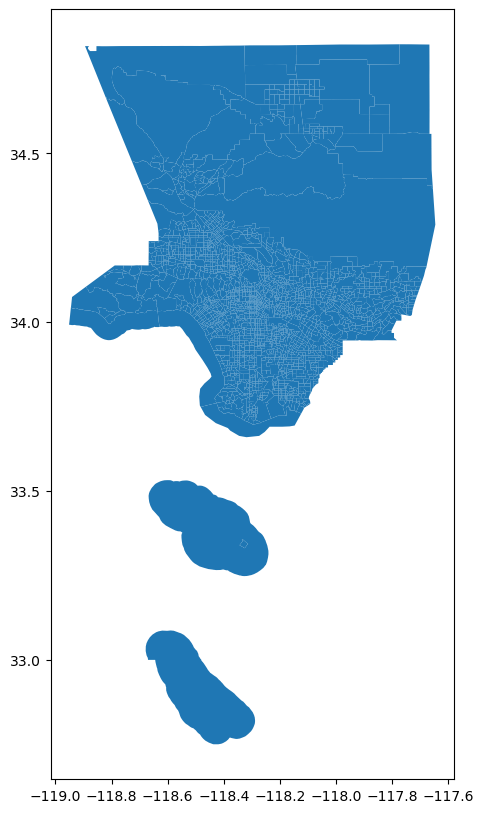

In [87]:
tracts.plot(figsize=(12,10))

In [88]:
tracts.head(5)

,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
2,06,037,204920,06037204920,1400000US06037204920,2049.20,Census Tract 2049.20,G5020,S,909972,0,+34.0175004,-118.1974975,"POLYGON ((-118.20284 34.01966, -118.20283 34.0..."
3,06,037,205110,06037205110,1400000US06037205110,2051.10,Census Tract 2051.10,G5020,S,286962,0,+34.0245059,-118.2142985,"POLYGON ((-118.21964 34.02628, -118.21945 34.0..."
4,06,037,320101,06037320101,1400000US06037320101,3201.01,Census Tract 3201.01,G5020,S,680504,0,+34.2992784,-118.4326573,"POLYGON ((-118.43882 34.29911, -118.43732 34.3..."
5,06,037,205120,06037205120,1400000US06037205120,2051.20,Census Tract 2051.20,G5020,S,1466242,0,+34.0187542,-118.2117951,"POLYGON ((-118.22023 34.02056, -118.22018 34.0..."
6,06,037,206010,06037206010,1400000US06037206010,2060.10,Census Tract 2060.10,G5020,S,1418137,20551,+34.0682177,-118.2320356,"POLYGON ((-118.23924 34.06726, -118.238 34.067..."


In [89]:
# add a FIPS column 
# if there is an ERROR it is SOMEWHERE HERE 
tracts['FIPS'] = '06' + '037' + tracts['TRACTCE']

In [90]:
# check new column
tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,FIPS
2,06,037,204920,06037204920,1400000US06037204920,2049.20,Census Tract 2049.20,G5020,S,909972,0,+34.0175004,-118.1974975,"POLYGON ((-118.20284 34.01966, -118.20283 34.0...",06037204920
3,06,037,205110,06037205110,1400000US06037205110,2051.10,Census Tract 2051.10,G5020,S,286962,0,+34.0245059,-118.2142985,"POLYGON ((-118.21964 34.02628, -118.21945 34.0...",06037205110
4,06,037,320101,06037320101,1400000US06037320101,3201.01,Census Tract 3201.01,G5020,S,680504,0,+34.2992784,-118.4326573,"POLYGON ((-118.43882 34.29911, -118.43732 34.3...",06037320101
5,06,037,205120,06037205120,1400000US06037205120,2051.20,Census Tract 2051.20,G5020,S,1466242,0,+34.0187542,-118.2117951,"POLYGON ((-118.22023 34.02056, -118.22018 34.0...",06037205120
6,06,037,206010,06037206010,1400000US06037206010,2060.10,Census Tract 2060.10,G5020,S,1418137,20551,+34.0682177,-118.2320356,"POLYGON ((-118.23924 34.06726, -118.238 34.067...",06037206010


In [91]:
# need to merge by creating a new dataframe
lacounty_race=tracts.merge(df2, on="FIPS")

In [92]:
#check if merging worked 
# see that tabular data and geometry are merged
lacounty_race.head(5)

,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,...,Total Population,Not Hispanic or Latino,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian and Other Pacific Islander Alone,Some Other Race Alone,Two or More Races,Hispanic or Latino
0,06,037,204920,06037204920,1400000US06037204920,2049.20,Census Tract 2049.20,G5020,S,909972,...,2459,128,68,49,0,0,0,0,11,2331
1,06,037,205110,06037205110,1400000US06037205110,2051.10,Census Tract 2051.10,G5020,S,286962,...,3690,48,14,8,14,0,0,0,12,3642
2,06,037,320101,06037320101,1400000US06037320101,3201.01,Census Tract 3201.01,G5020,S,680504,...,3402,424,236,65,0,123,0,0,0,2978
3,06,037,205120,06037205120,1400000US06037205120,2051.20,Census Tract 2051.20,G5020,S,1466242,...,3409,106,15,8,13,70,0,0,0,3303
4,06,037,206010,06037206010,1400000US06037206010,2060.10,Census Tract 2060.10,G5020,S,1418137,...,3490,1571,500,17,0,1030,0,2,22,1919


In [93]:
# appears to include all the information for mapping 
lacounty_race.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 28 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   STATEFP                                           2498 non-null   object  
 1   COUNTYFP                                          2498 non-null   object  
 2   TRACTCE                                           2498 non-null   object  
 3   GEOID                                             2498 non-null   object  
 4   GEOIDFQ                                           2498 non-null   object  
 5   NAME                                              2498 non-null   object  
 6   NAMELSAD                                          2498 non-null   object  
 7   MTFCC                                             2498 non-null   object  
 8   FUNCSTAT                                          2498 non-null   object  
 9   

<Axes: >

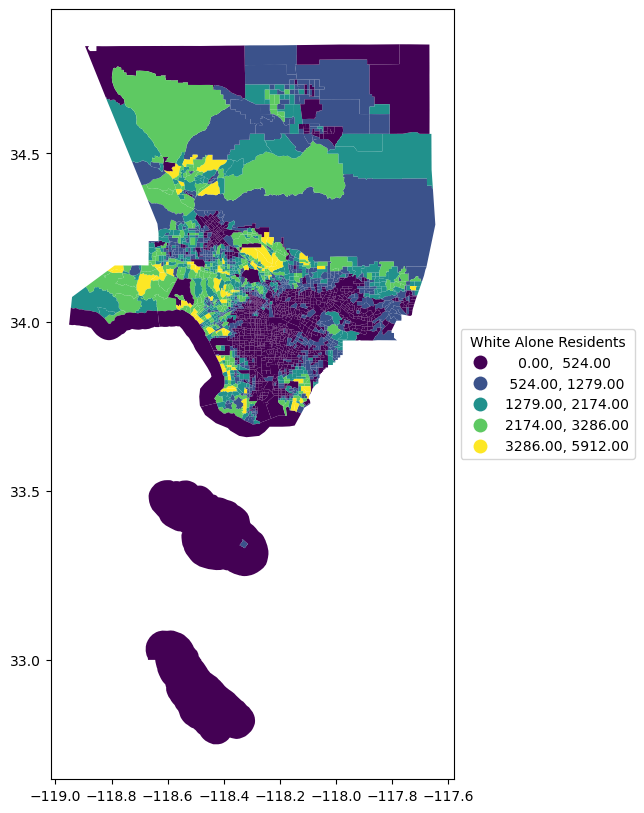

In [94]:
# mapping White Alone
# using natural breaks since the data is skewed right
lacounty_race.plot(figsize=(12,10),
                   column='White Alone',
                   legend=True,
                   scheme='NaturalBreaks',
                  legend_kwds={'loc': 'center left', 'title': 'White Alone Residents', 'bbox_to_anchor': (1,0.50)})
                   

<Axes: >

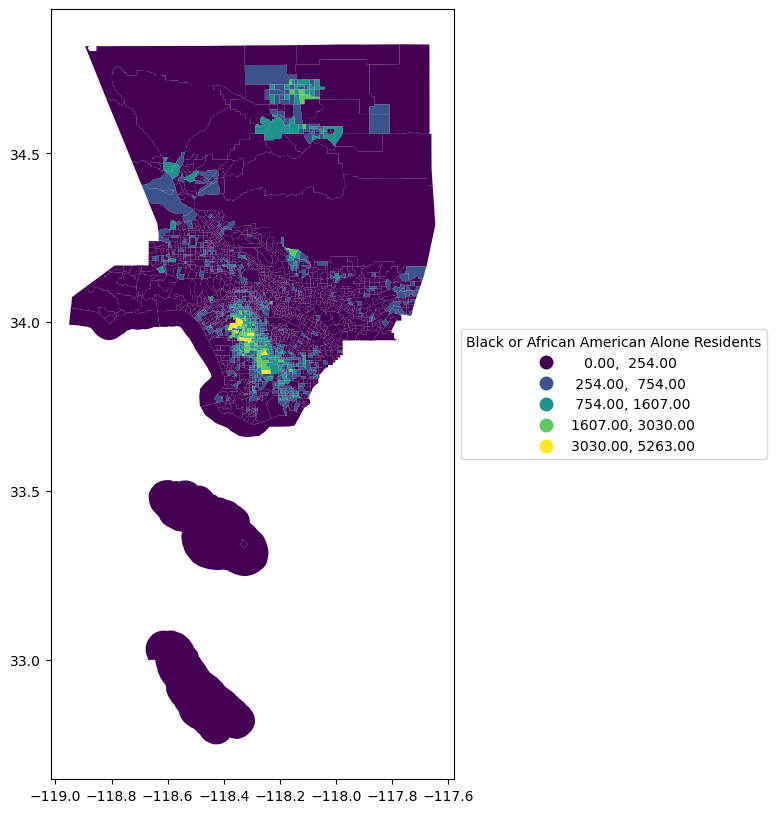

In [95]:
# mapping Black or African American Alone
# using natural breaks since the data is skewed right
lacounty_race.plot(figsize=(12,10),
                   column='Black or African American Alone',
                   legend=True,
                   scheme='NaturalBreaks',
            legend_kwds={'loc': 'center left', 'title': 'Black or African American Alone Residents', 'bbox_to_anchor': (1,0.50)})
                   

<Axes: >

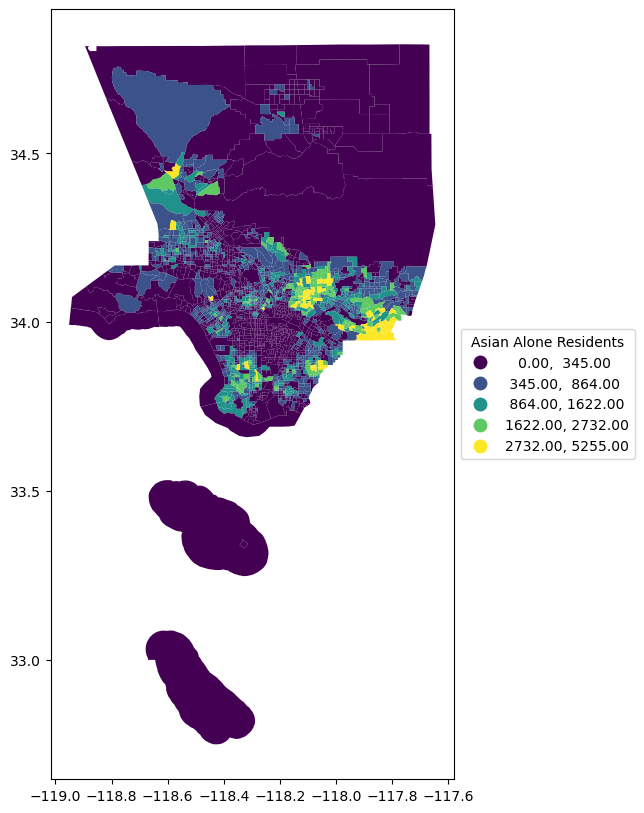

In [96]:
# mapping Asian Alone
# using natural breaks since the data is skewed right
lacounty_race.plot(figsize=(12,10),
                   column='Asian Alone',
                   legend=True,
                   scheme='NaturalBreaks',
                    legend_kwds={'loc': 'center left', 'title': 'Asian Alone Residents', 'bbox_to_anchor': (1,0.50)})
                   

<Axes: >

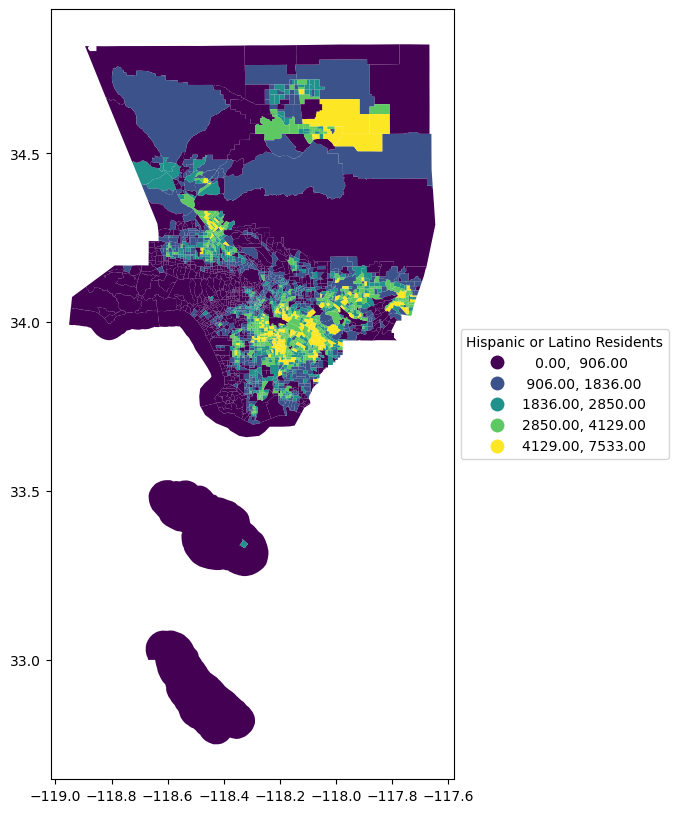

In [97]:
# mapping Hispanic or Latino
# using natural breaks since the data is skewed right
lacounty_race.plot(figsize=(12,10),
                   column='Hispanic or Latino',
                   legend=True,
                   scheme='NaturalBreaks',
                    legend_kwds={'loc': 'center left', 'title': 'Hispanic or Latino Residents', 'bbox_to_anchor': (1,0.50)})
                   

# Next Steps  
Overlay collision data 